In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Look at the data we've got:
data = pd.read_csv('training_data.csv')
data.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


In [3]:
#What are the columns?
data.columns

Index(['PatientID', 'Resp', 'PR Seq', 'RT Seq', 'VL-t0', 'CD4-t0'], dtype='object')

In [4]:
#How is the data distributed?
data['Resp'].value_counts()

0    794
1    206
Name: Resp, dtype: int64

In [5]:
#How do the sequences vary? This looks at length:

data['PR Seq'].dropna().apply(lambda x: len(str(x))).value_counts()

297    889
294     14
267      6
270      3
285      2
252      2
276      1
261      1
255      1
216      1
Name: PR Seq, dtype: int64

In [6]:
#What about the other sequence?
data['RT Seq'].dropna().apply(lambda x: len(str(x))).value_counts()

900     150
909      93
903      88
1005     80
750      74
906      60
897      23
1464     22
972      13
1461     13
912      13
1452     12
840       9
1467      9
876       9
894       9
783       9
885       8
801       8
852       8
855       8
774       8
1473      8
1470      8
1449      7
1002      7
888       7
1476      7
810       7
1458      7
       ... 
1074      1
1098      1
1347      1
1110      1
996       1
705       1
969       1
966       1
846       1
837       1
834       1
828       1
879       1
819       1
887       1
795       1
789       1
896       1
939       1
744       1
723       1
672       1
654       1
597       1
579       1
1482      1
1479      1
951       1
963       1
1032      1
Name: RT Seq, Length: 116, dtype: int64

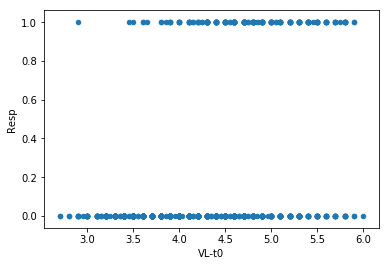

In [7]:
#How is Viral Load and Response linked?
data.plot.scatter('VL-t0', 'Resp')

In [8]:
#The above plot looks like the relationship follows
#a logistic regression - this is common for binary 
#data (given Resp is either 0 or 1, we call the data binary)

In [9]:
#Run a simple Logistic regression to predict
#responsiveness from Viral Load and CD4 count:
#(You can ignore the warnings this generates, if any.)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
X = data[['VL-t0', 'CD4-t0']]
y = data['Resp']
model.fit(X,y)
y_pred = model.predict(X)
acc = sum(data['Resp']==y_pred)/len(data['Resp'])
print('Accuracy of Logistic Regression Model: {}%'.format(acc*100))

Accuracy of Logistic Regression Model: 78.7%


In [10]:
from sklearn.metrics import confusion_matrix, f1_score

In [11]:
confusion_matrix(y,y_pred)

array([[758,  36],
       [177,  29]])

In [12]:
f1_score(y, y_pred)

0.2140221402214022

In [13]:
'''Using just Viral Load and CD4 count, we have an okay model. We can do better.
The next question: how to represent variable length sequences as fixed-length, numerical data?
Answer: word2vec embeddings. A simple one is implemented below.'''

'Using just Viral Load and CD4 count, we have an okay model. We can do better.\nThe next question: how to represent variable length sequences as fixed-length, numerical data?\nAnswer: word2vec embeddings. A simple one is implemented below.'

In [15]:
!pip install gensim

    100% |████████████████████████████████| 24.7MB 1.2MB/s 
    100% |████████████████████████████████| 71kB 2.3MB/s 
    100% |████████████████████████████████| 133kB 2.6MB/s 
    100% |████████████████████████████████| 5.5MB 1.3MB/s 
    100% |████████████████████████████████| 71kB 2.6MB/s 
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /Users/mgbvox/Library/Caches/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open


'CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAGGGGGGCAACTAAAGGAAGCYCTATTAGATACAGGAGCAGATGATACAGTATTAGAAGACATGGAGTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAARACAGTATGATCAGRTACCCATAGAAATCTATGGACATAAAGCTGTAGGTACAGTATTAATAGGACCTACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGCTTGGTTGCACTTTAAATTTY'

In [14]:
from gensim.models import Word2Vec

def seq_to_cols(seq):
    # define training data
    sentences = seq.values
    sentences = [[i] for i in sentences]
    # train model
    model = Word2Vec(sentences, min_count=1)
    # summarize the loaded model
    print(model)
    # summarize vocabulary
    words = list(model.wv.vocab)
    #print(words)

    # access vector for one word
    #print(model[data['PR Seq'].dropna().values[0]].shape)

    seq_name = '_'.join(seq.name.split(' '))

    # save model
    model.save('{}_model.bin'.format(seq_name))
    
    '''Not required - but here is how to load a model:
    # load model
    model = Word2Vec.load('{}_model.bin'.format(seq_name))
    '''
    
    res_df = seq.apply(lambda x: model[x]).apply(pd.Series)
    return res_df

ModuleNotFoundError: No module named 'gensim'

In [27]:
'''Embed each column - ignore the warnings.'''
data = data.dropna(how='any')
pr_df = seq_to_cols(data['PR Seq'])
rt_df = seq_to_cols(data['RT Seq'])

Word2Vec(vocab=920, size=100, alpha=0.025)
Word2Vec(vocab=920, size=100, alpha=0.025)


/Users/mgb/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/Users/mgb/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/Users/mgb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/mgb/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib

In [28]:
X = pd.concat([pr_df,rt_df], axis=1)
y = data['Resp']

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

model.fit(X,y)
y_pred = model.predict(X)
acc = sum(data['Resp']==y_pred)/len(data['Resp'])
print('Accuracy of Logistic Regression Model: {}%'.format(acc*100))

Accuracy of Logistic Regression Model: 79.67391304347827%


In [31]:
'''More accurate, but it predicts all zeros:'''
confusion_matrix(y,y_pred)

array([[733,   0],
       [187,   0]])

In [32]:
'''Time to break out the big guns - Feed Forward Neural Networks!'''
x_train = X
y_train = y

In [33]:
'''Build, compile, and train a basic neural network on the provided data:'''

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation 
from keras.optimizers import Adam

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


model = Sequential()

model.add(Dense(64, input_shape=x_train.values[0].shape, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, shuffle = True, validation_split=.2) #, validation_data = (x_valid, y_valid))



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 736 samples, validate on 184 samples
Epoch 1/100
736/736 [==============================] - 0s 341us/step - loss: 0.6078 - acc: 0.8207 - val_loss: 0.6142 - val_acc: 0.7011
Epoch 2/100
736/736 [==============================] - 0s 28us/step - loss: 0.4739 - acc: 0.8207 - val_loss: 0.6639 - val_acc: 0.7011
Epoch 3/100
736/736 [==============================] - 0s 30us/step - loss: 0.4697 - acc: 0.8207 - val_loss: 0.6568 - val_acc: 0.7011
Epoch 4/100
736/736 [==============================] - 0s 31us/step - loss: 0.4684 - acc: 0.8207 - val_loss: 0.6585 - val_acc: 0.7011
Epoch 5/100
736/736 [==============================] - 0s 32us/step - loss: 0.4655 - acc: 0.8207 - val_loss: 0.6571 - val_acc: 0.7011
Epoch 6/100
736/736 [==============================] - 0s 37us/step - loss: 0.4640 - acc: 0.8207 - val_loss: 0.6598 - val_acc: 0.7011
Epoch 7/100
736/736 [========

In [52]:
#Compare the results:
y_pred = np.round(model.predict(x_train))
y_real = y.apply(float).values

acc = sum(data['Resp']==y_pred.ravel())/len(data['Resp'])
print('Accuracy of Logistic Regression Model: {}%'.format(acc*100))

confusion_matrix(y_real,y_pred)

Accuracy of Logistic Regression Model: 92.93478260869566%


array([[707,  26],
       [ 39, 148]])

In [53]:
#Better! Let's compare accuracy over training time for training and validation data:

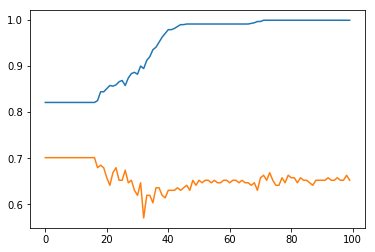

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [55]:
#Oh.
#We'll probably need to regularize, then. 